# Using Neural Network on Gas Turbines Dataset


In [1]:
#pip install keras_tuner

In [3]:
#import modin.pandas as pd
import pandas as pd
import numpy as np 
from keras.layers import Dense
from keras_tuner.tuners import RandomSearch
from keras import Sequential
#import ray
#ray.init(runtime_env={'env_vars': {'__MODIN_AUTOIMPORT_PANDAS__': '1'}})

In [4]:
gas=pd.read_csv("/content/gas_turbines.csv")

In [5]:
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [6]:
#moving our Target  column to first column
first_column=gas.pop('TEY')
gas.insert(0,'TEY',first_column)
gas

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,111.61,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,111.78,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,110.19,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,110.74,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


# EDA

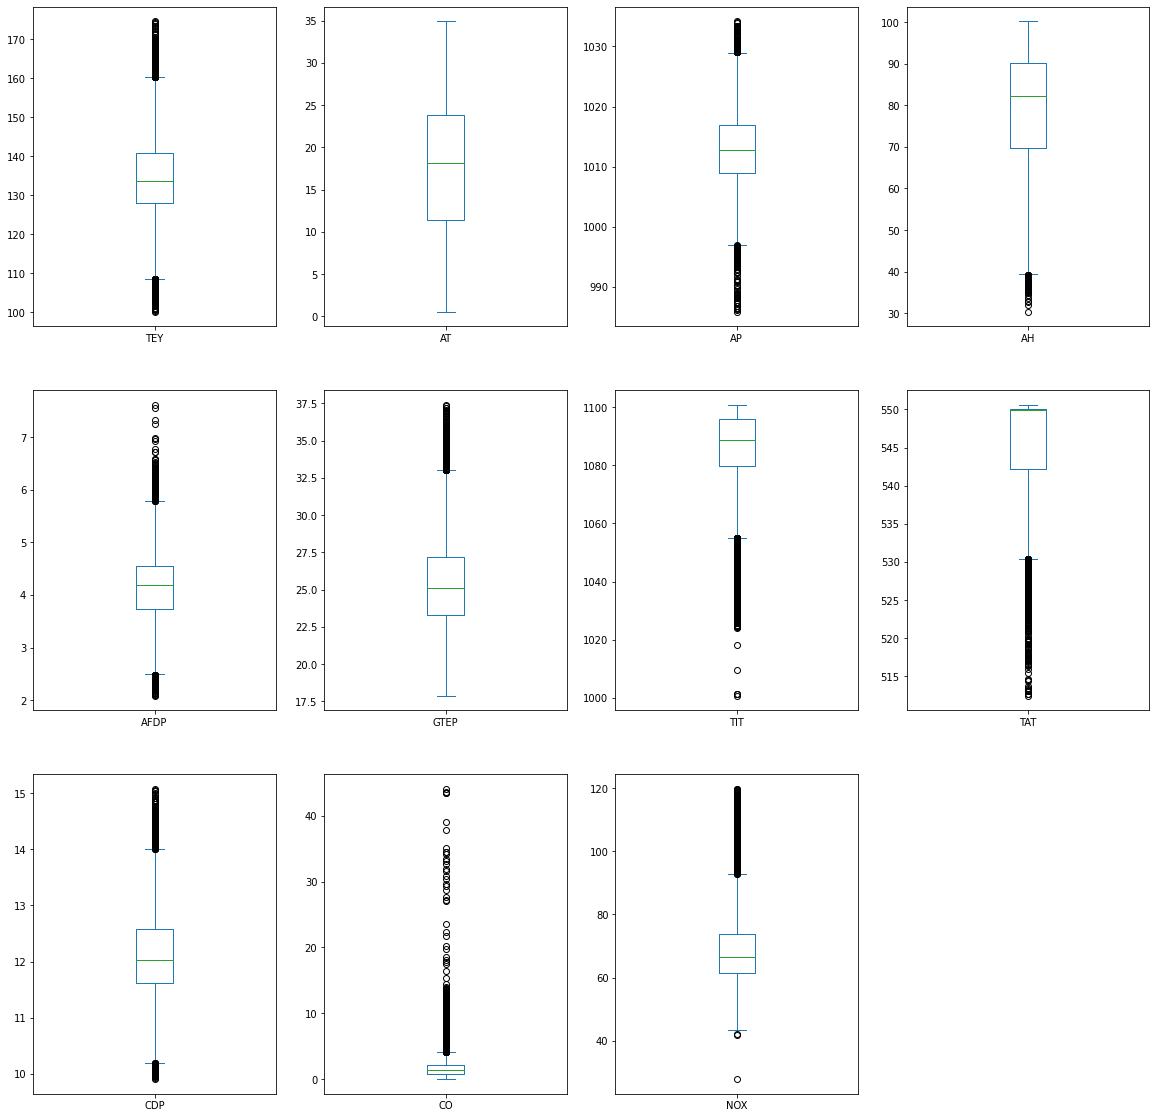

In [7]:
from matplotlib import pyplot as plt


gas.plot(kind='box',subplots=True, layout=(3,4),figsize=(20,20))
plt.show()

In [8]:
from scipy import stats

In [9]:
zsc=stats.zscore(gas) #Trying to remove outliers based on Z scores and removing the datapoints which are above Zscore=3 
zscores=np.abs(zsc)  #Making all values absolute to make -ve alues to +ve so that we can easily remove the Zscores above 3
filter_zscores=(zscores<3).all(axis=1)
filtered=gas[filter_zscores]
filtered.shape #here there are 492 rows outliers as we can see after transforming df and trying to eliminate the zvalues above 3 and below -3 

(14547, 11)

In [10]:
gas.shape

(15039, 11)

In [11]:
filtered

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,111.61,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,111.78,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,110.19,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,110.74,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


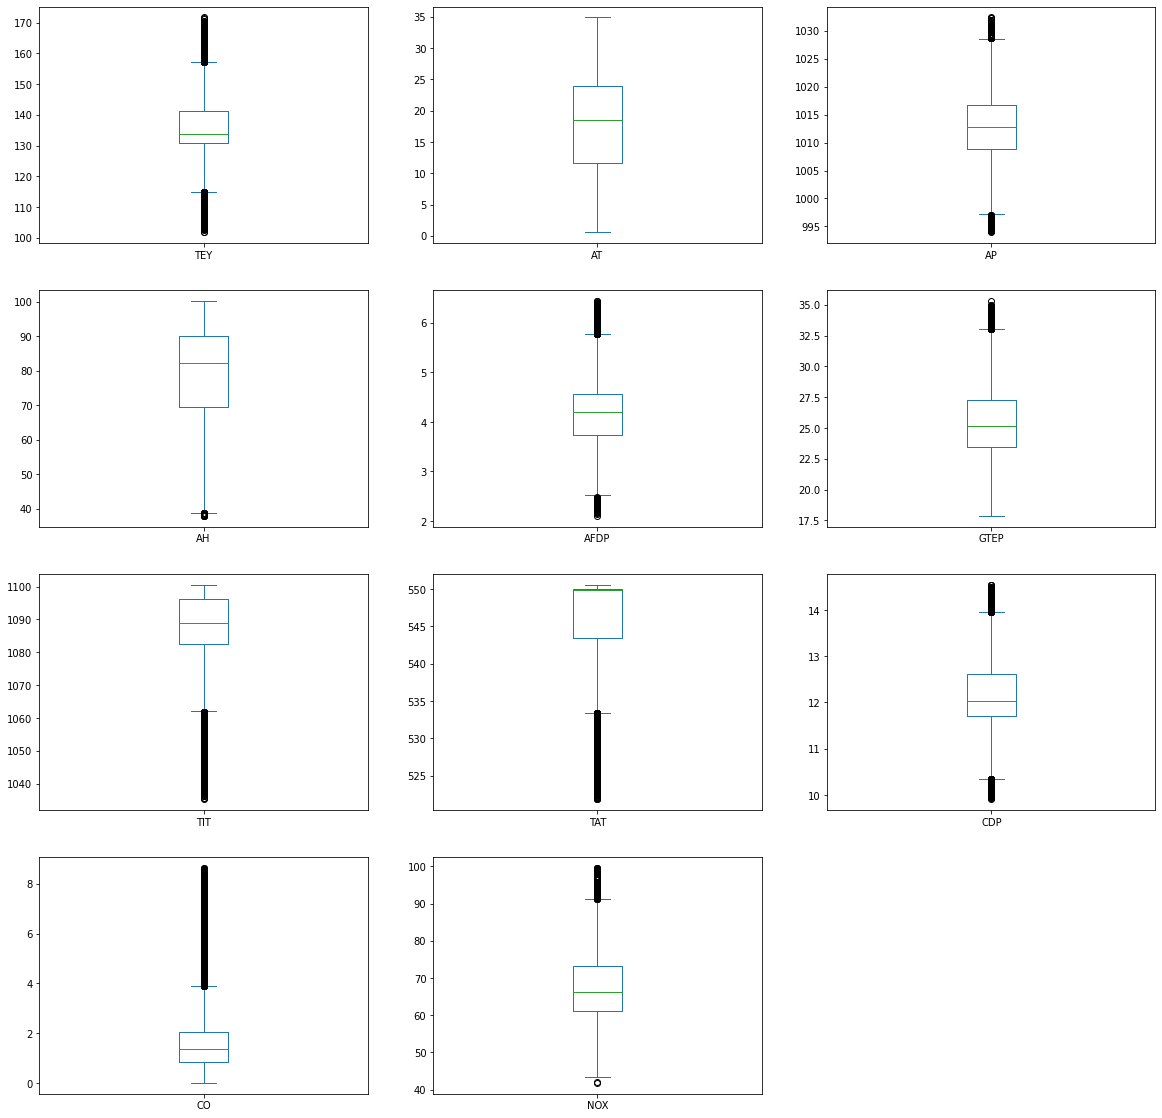

In [12]:
filtered.plot(kind='box',layout=(4,3),figsize=(20,20),subplots=True)
plt.show()

In [13]:
#Lets Try Isolation Forest method for Outlier Detection 
from sklearn.ensemble import IsolationForest
clf=IsolationForest(random_state=20,contamination=0.10) #based on domain knowledge the contamination value should be set
clf.fit(filtered)
filtered['anomaly']=clf.predict(filtered)
filtered

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
<ipython-input-13-e1a1c9918603>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['anomaly']=clf.predict(filtered)


,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,anomaly
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,1
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,1
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,1
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,1
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15034,111.61,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,-1
15035,111.78,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,-1
15036,110.19,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,-1
15037,110.74,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,-1


In [14]:
filtered.shape

(14547, 12)

In [15]:
#dropping  1455 records at contamination of 10% assumption
filtered.drop(filtered[filtered['anomaly']==-1].index,inplace=True)
filtered.shape

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(13092, 12)

#Using PPS Score to identify correlation
import ppscore as pps


In [16]:
filtered=filtered.drop(['anomaly'],axis=1)
filtered

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15029,110.78,10.4540,1004.5,98.388,3.5555,18.937,1053.4,550.03,10.327,3.6133,79.189
15030,110.78,10.3050,1004.6,99.282,3.5339,18.909,1053.3,550.00,10.328,3.7118,79.165
15031,121.26,10.2380,1004.6,99.995,3.8805,21.206,1067.5,550.32,11.002,2.6790,76.985
15032,133.74,10.3470,1004.9,100.170,4.3198,24.048,1084.3,549.98,11.685,1.3663,74.547


In [2]:
#pip install sweetviz

In [18]:
#Automatic EDA using Sweetviz
import sweetviz as sv
sweet_report=sv.analyze(filtered)
sweet_report.show_html('EDA_of_Gas_Turbines.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_of_Gas_Turbines.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


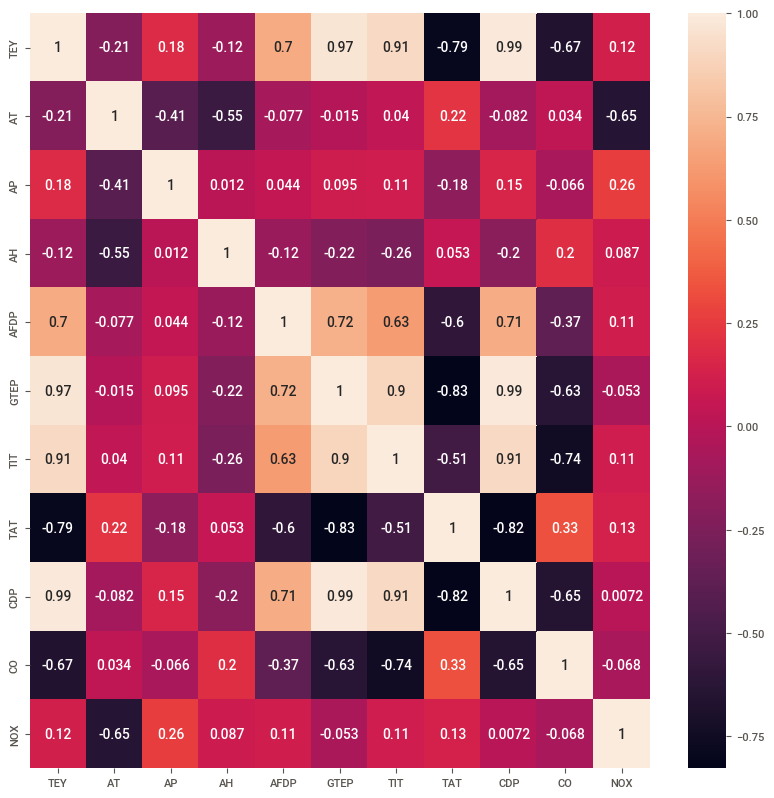

In [19]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(filtered.corr(),annot=True)
plt.show()

## Here we have 3 Multicollinearity problem between Columns which are TAT vs GTEP at -0.83 , TAT vs CDP at -0.82, TIT vs CO at -0.74 
## We are going to consider Multicollinearity problem when there is >0.7 correlation between Independent Features(Columns)

## But MultiCollinearity is handled very well by Neural Networks as Neural Networks have Back propagation and non-linear activation functions which makes multicollinearity unimportant 

In [20]:
X=filtered.iloc[:,1:]
Y=filtered.iloc[:,:1]
Y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15029,110.78
15030,110.78
15031,121.26
15032,133.74


# Creating Model by using Hyperparameter Tuning 

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [22]:
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)

In [23]:
from tensorflow import keras
from keras_tuner.tuners import RandomSearch
from keras.layers import Dropout, Dense
from keras import Sequential
activation=['tanh','relu','leakyrelu','elu','sigmoid']

In [24]:
def build_model(hp):

    model=Sequential()
    for i in range(hp.Int('num_Layers',2,20)):

        model.add(Dense(units=hp.Int('units_'+str(i),min_value=8,max_value=132,step=8),activation=hp.Choice('activation'+str(i),values=['tanh','relu','sigmoid'])))
        model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        model.add(Dense(1,activation='linear'))
        model.compile(optimizer=keras.optimizers.Adamax(hp.Choice('learning_rate',[0.1,0.01,0.001])),loss='mean_absolute_error',metrics=['mean_absolute_error'])
    return model


In [25]:
tuner=RandomSearch(hypermodel=build_model,objective='val_mean_absolute_error',max_trials=5,executions_per_trial=3,directory='project',project_name='Gas_Turbines',overwrite=True)

In [26]:
tuner.search_space_summary()

Search space summary
Default search space size: 8
num_Layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 132, 'step': 8, 'sampling': 'linear'}
activation0 (Choice)
{'default': 'tanh', 'conditions': [], 'values': ['tanh', 'relu', 'sigmoid'], 'ordered': False}
dropout0 (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'ordered': True}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 132, 'step': 8, 'sampling': 'linear'}
activation1 (Choice)
{'default': 'tanh', 'conditions': [], 'values': ['tanh', 'relu', 'sigmoid'], 'ordered': False}
dropout1 (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'ordered': True}


In [27]:
tuner.search(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Trial 5 Complete [00h 09m 52s]
val_mean_absolute_error: 9.302498499552408

Best val_mean_absolute_error So Far: 9.300877571105957
Total elapsed time: 00h 43m 23s


In [28]:
tuner.get_best_hyperparameters()[0].values

{'num_Layers': 3,
 'units_0': 24,
 'activation0': 'sigmoid',
 'dropout0': 0.8,
 'learning_rate': 0.1,
 'units_1': 16,
 'activation1': 'tanh',
 'dropout1': 0.3,
 'units_2': 8,
 'activation2': 'tanh',
 'dropout2': 0.1}

In [29]:
model=tuner.get_best_models(num_models=1)[0]

In [30]:
model.fit(x_train,y_train,epochs=100,initial_epoch=5,validation_data=(x_test,y_test))

Epoch 6/100
287/287 [==============================] - 2s 4ms/step - loss: 9.3419 - mean_absolute_error: 9.3419 - val_loss: 9.3025 - val_mean_absolute_error: 9.3025
Epoch 7/100
287/287 [==============================] - 1s 4ms/step - loss: 9.3425 - mean_absolute_error: 9.3425 - val_loss: 9.3009 - val_mean_absolute_error: 9.3009
Epoch 8/100
287/287 [==============================] - 1s 4ms/step - loss: 9.3425 - mean_absolute_error: 9.3425 - val_loss: 9.3011 - val_mean_absolute_error: 9.3011
Epoch 9/100
287/287 [==============================] - 1s 4ms/step - loss: 9.3412 - mean_absolute_error: 9.3412 - val_loss: 9.3012 - val_mean_absolute_error: 9.3012
Epoch 10/100
287/287 [==============================] - 1s 4ms/step - loss: 9.3413 - mean_absolute_error: 9.3413 - val_loss: 9.3011 - val_mean_absolute_error: 9.3011
Epoch 11/100
287/287 [==============================] - 1s 4ms/step - loss: 9.3413 - mean_absolute_error: 9.3413 - val_loss: 9.3012 - val_mean_absolute_error: 9.3012
Epoch 12

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                264       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
 dense_4 (Dense)             (None, 8)                 1

In [32]:
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adamax
from keras.wrappers.scikit_learn import KerasRegressor

In [33]:
# Below code will take more time than 4hours needs  GPUs to run fast  

def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model=Sequential()
    model.add(Dense(neuron1,kernel_initializer=init,activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim=neuron1,kernel_initializer=init,activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation='linear'))

    adamax= Adamax(learning_rate=learning_rate)
    model.compile(optimizer=adamax, loss='rmsprop',metrics=['mean_absolute_error'])
    return model

#Create Model
model=KerasRegressor(build_fn=create_model,verbose=0)


#Parameters for GridSearchCV 
batch_size=[10,20,40]
epochs=[10,50,100]
learning_rate=[0.1,0.01,0.001]
dropout_rate=[0.0,0.1,0.2]
activation_function=['softmax','relu','tanh','linear']
init=['uniform','normal','zero']
neuron1=[4,8,16]
neuron2=[2,4,8]

#Make a Dictionary of Params Grid 
params_grid=dict(batch_size=batch_size,epochs=epochs,learning_rate=learning_rate,dropout_rate=dropout_rate,
                      activation_function=activation_function,init=init,neuron1=neuron1,neuron2=neuron2)
                
#Build and fit the Grid Search CV
grid=GridSearchCV(estimator=model,param_grid=params_grid)
grid_result=grid.fit(X,Y)


# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))